## 성별에 따른 배달 소비 관계 분석 

삼성카드가 추정한 배달음식 선호성향 따른 외식소비패턴 분석 데이터입니다. 카드사에서 제공한 샘플데이터이기 때문에 일반화 할 수 없음을 미리 밝힙니다. <br>
※ 배달식선호/건강관심 성향 : 당사가 회원의 소비데이터로 모델링하여 추정한 고객의 특성. 지수를 20 등급화(1등급이 제일 관심도가 높음/건강관심도 페르소나 등급(20등급)) 

### 패키지 가져오기

In [356]:
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from pandas import read_excel, DataFrame, melt
from statsmodels.graphics.mosaicplot import mosaic
from pandas import read_excel, pivot_table
import seaborn as sb
import numpy as np
import sys
import os

기본 설정

In [357]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["axes.unicode_minus"] = False

### 데이터 불러오기

In [358]:
df = read_excel("삼성카드_외식소비패턴.xlsx")
df

,소비년월,거주지_광역시도,거주지_시군구,배달식선호등급,건강관심도등급,연령대,성별,외식업종분류,평일휴일,소비건수합계
0,202009,경기,시흥시,1,17,20대,남성,간편음식,평일,83
1,202009,경기,부천시,1,15,20대,여성,한식,평일,101
2,202009,경기,이천시,4,19,30대,남성,피자/치킨,평일,12
3,202009,경기,오산시,2,16,30대,남성,디저트,평일,95
4,202009,경기,김포시,10,16,40대,남성,디저트,휴일,49
...,...,...,...,...,...,...,...,...,...,...
95,202009,인천,부평구,5,19,30대,남성,한식,평일,71
96,202009,인천,부평구,9,15,40대,여성,디저트,평일,36
97,202010,인천,서구,3,15,20대,여성,한식,평일,37
98,202010,인천,연수구,1,18,30대,남성,간편음식,평일,84


### 데이터 타입(종류) 확인

In [359]:
df.shape

(100, 10)

In [360]:
df.dtypes

소비년월         int64
거주지_광역시도    object
거주지_시군구     object
배달식선호등급      int64
건강관심도등급      int64
연령대         object
성별          object
외식업종분류      object
평일휴일        object
소비건수합계       int64
dtype: object

In [361]:
df = df.astype({'거주지_광역시도': 'category', '거주지_시군구': 'category', '연령대': 'category','성별': 'category', '외식업종분류': 'category', '평일휴일': 'category'})
df.dtypes

소비년월           int64
거주지_광역시도    category
거주지_시군구     category
배달식선호등급        int64
건강관심도등급        int64
연령대         category
성별          category
외식업종분류      category
평일휴일        category
소비건수합계         int64
dtype: object

### 데이터 전처리
1) 결측치 확인 → 결측치 없음
2) '소비건수합계' column의 이상치 확인

In [362]:
empty = df.isnull()
empty.sum()

소비년월        0
거주지_광역시도    0
거주지_시군구     0
배달식선호등급     0
건강관심도등급     0
연령대         0
성별          0
외식업종분류      0
평일휴일        0
소비건수합계      0
dtype: int64

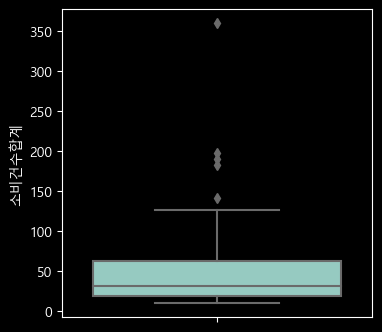

In [363]:
plt.figure(figsize=(4, 4))
sb.boxplot(data=df,y='소비건수합계')
plt.show()
plt.close()

In [364]:
# df.loc[df["소비건수합계"] > 300, "소비건수합계"] = np.nan 
# df
# def replaceMissingValue(df): # MisttingValue = 결측치
#     imr = SimpleImputer(missing_values=np.nan, strategy='max') 
#     df_imr = imr.fit_transform(df.values) # fit으로 인공지능 모델에게 데이터를 학습시키고, transform으로 실제 적용하는 함수
#     re_df = DataFrame(df_imr, index=df.index, columns=df.columns)
#     return re_df 

# final_df = replaceMissingValue(df) 
# final_df

### 수치형 변수의 데이터 요약 통계 

In [365]:
df.describe()

,소비년월,배달식선호등급,건강관심도등급,소비건수합계
count,100.00000,100.000000,100.000000,100.000000
mean,202009.57000,7.430000,13.630000,49.010000
std,0.49757,6.039023,5.434003,50.061073
min,202009.00000,1.000000,1.000000,10.000000
25%,202009.00000,2.000000,10.750000,19.000000
50%,202010.00000,5.500000,15.500000,32.000000
75%,202010.00000,12.000000,18.000000,63.250000
max,202010.00000,20.000000,20.000000,360.000000


### 명목형 변수에 대한 기술 통계

In [366]:
df2 = df.drop(['소비년월', '배달식선호등급', '건강관심도등급', '소비건수합계'], axis=1)

for v in df2.columns:
    print(df2[v].value_counts())
    print("-" * 30)

거주지_광역시도
서울    51
경기    14
인천     8
대전     7
광주     6
부산     6
대구     5
울산     2
세종     1
Name: count, dtype: int64
------------------------------
거주지_시군구
서구     7
서초구    6
북구     6
송파구    6
강서구    5
동작구    4
노원구    4
마포구    3
강남구    3
부천시    3
동구     3
양천구    3
이천시    3
수성구    2
부평구    2
연수구    2
중구     2
성동구    2
중랑구    2
강동구    2
강북구    2
남구     2
관악구    2
광명시    2
도봉구    1
시흥시    1
종로구    1
은평구    1
유성구    1
울주군    1
용산구    1
오산시    1
양주시    1
수영구    1
동래구    1
광주시    1
광진구    1
성북구    1
구로구    1
군포시    1
금정구    1
김포시    1
남동구    1
달서구    1
대덕구    1
       1
Name: count, dtype: int64
------------------------------
연령대
30대      30
40대      26
50대      20
20대      18
60대이상     6
Name: count, dtype: int64
------------------------------
성별
남성    50
여성    50
Name: count, dtype: int64
------------------------------
외식업종분류
디저트       35
한식        29
간편음식      19
고기         5
주점         3
중식         3
피자/치킨      3
일식/회       2
양식/아시안     1
Name: count, dtype: int64
-------------------------

1. 지역별

In [367]:
지역별 = pivot_table(df,
            index='거주지_광역시도', 
            columns='성별', 
            values='소비건수합계',
            aggfunc='mean' 
)

지역별 = 지역별.fillna(value=0)
지역별

성별,남성,여성
거주지_광역시도,,
경기,41.125000,43.166667
광주,11.000000,21.800000
대구,44.666667,17.000000
대전,22.500000,29.000000
부산,18.000000,30.750000
서울,44.280000,76.538462
세종,24.000000,0.000000
울산,19.000000,0.000000
인천,55.750000,76.750000


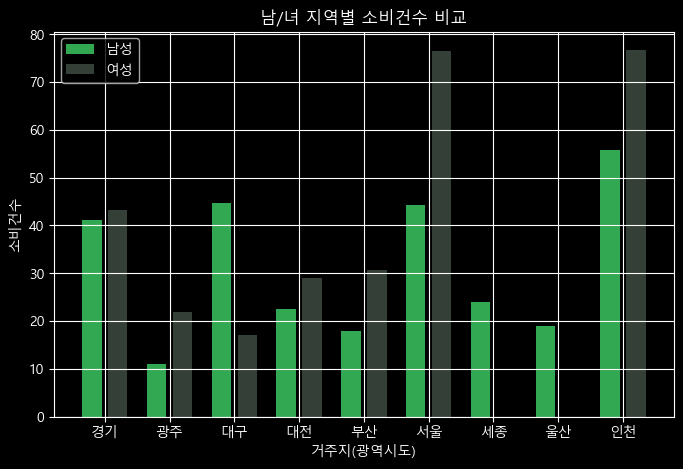

In [368]:
x_rables=list(지역별.index)
x = np.array(range(0,len(x_rables)))
y1 = list(지역별['남성'])
y2 = list(지역별['여성'])

plt.rcParams['figure.figsize'] = (8,5)
plt.figure()
plt.title('남/녀 지역별 소비건수 비교')
plt.bar(x-0.2,지역별['남성'],color='#32a852',label='남성',width=0.3)
plt.bar(x+0.2,지역별['여성'],color='#344037',label='여성',width=0.3)
plt.xlabel('거주지(광역시도)')
plt.ylabel('소비건수')
plt.grid()
plt.legend()
plt.xticks(x,x_rables)
plt.show()
plt.close()

In [369]:
거주지별소비건수 = df.query('거주지_광역시도=="서울"')
거주지별소비건수 = 거주지별소비건수.sort_values('거주지_시군구')
거주지별소비건수.head()

,소비년월,거주지_광역시도,거주지_시군구,배달식선호등급,건강관심도등급,연령대,성별,외식업종분류,평일휴일,소비건수합계
43,202009,서울,강남구,2,19,30대,남성,한식,휴일,64
67,202010,서울,강남구,8,14,30대,여성,디저트,평일,110
66,202010,서울,강남구,2,18,30대,여성,한식,휴일,73
41,202009,서울,강동구,2,20,30대,여성,한식,휴일,40
77,202010,서울,강동구,12,11,40대,여성,한식,평일,35


In [370]:
구별 = pivot_table(거주지별소비건수,
            index='거주지_시군구', 
            columns='성별', 
            values='소비건수합계',
            aggfunc='mean' 
)

구별 = 구별.fillna(value=0)
구별

성별,남성,여성
거주지_시군구,,
강남구,64.0,91.50
강동구,0.0,37.50
강북구,29.5,0.00
강서구,82.5,69.00
관악구,81.0,198.00
광진구,16.0,0.00
구로구,0.0,17.00
노원구,33.0,36.50
도봉구,10.0,0.00


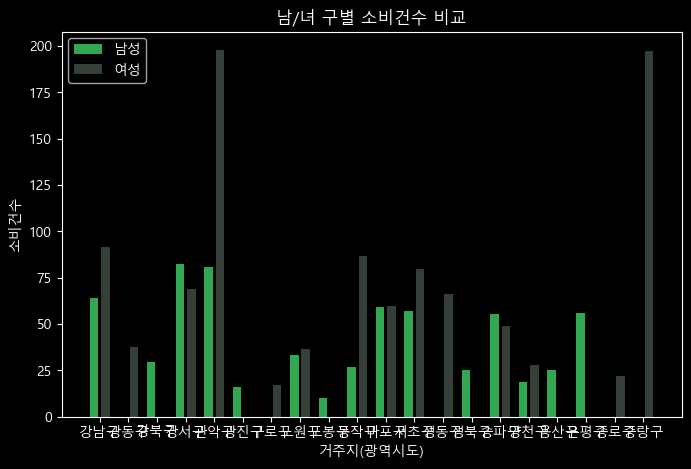

In [371]:
x_rables=list(구별.index)
x = np.array(range(0,len(x_rables)))
y1 = list(구별['남성'])
y2 = list(구별['여성'])

plt.rcParams['figure.figsize'] = (8,5)
plt.figure()
plt.title('남/녀 구별 소비건수 비교')
plt.bar(x-0.2,구별['남성'],color='#32a852',label='남성',width=0.3)
plt.bar(x+0.2,구별['여성'],color='#344037',label='여성',width=0.3)
plt.xlabel('거주지(광역시도)')
plt.ylabel('소비건수')
plt.legend()
plt.xticks(x,x_rables)
plt.show()
plt.close()

In [372]:
성별_소비 = pivot_table(df,
            index='소비년월', 
            columns='성별', 
            values='소비건수합계',
            aggfunc='mean' 
)
성별_소비

성별,남성,여성
소비년월,,
202009,47.052632,50.583333
202010,35.419355,65.192308


In [373]:
x_rables=list(성별_소비.index)
x = np.array(range(0,len(x_rables)))
y1 = list(성별_소비['남성'])
y2 = list(성별_소비['여성'])

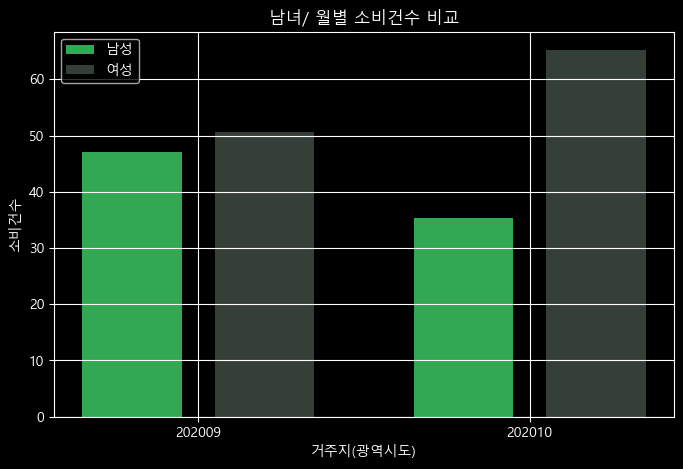

In [374]:
plt.rcParams['figure.figsize'] = (8,5)
plt.figure()
plt.title('남녀/ 월별 소비건수 비교')
plt.bar(x-0.2,성별_소비['남성'],color='#32a852',label='남성',width=0.3)
plt.bar(x+0.2,성별_소비['여성'],color='#344037',label='여성',width=0.3)
plt.xlabel('거주지(광역시도)')
plt.ylabel('소비건수')
plt.grid()
plt.legend()
plt.xticks(x,x_rables)
plt.show()
plt.close()

3. 업종별 

In [375]:
성별_업종 = pivot_table(df,
            index='외식업종분류', 
            columns='성별',
            values='소비건수합계',
            aggfunc='mean' 
)
성별_업종

성별,남성,여성
외식업종분류,,
간편음식,46.142857,50.750000
고기,48.500000,23.666667
디저트,38.571429,74.142857
양식/아시안,NaN,49.000000
일식/회,18.000000,NaN
주점,22.333333,NaN
중식,20.666667,NaN
피자/치킨,12.333333,NaN
한식,51.875000,47.923077


In [376]:
성별_업종 = 성별_업종.fillna(value=0)
성별_업종

성별,남성,여성
외식업종분류,,
간편음식,46.142857,50.750000
고기,48.500000,23.666667
디저트,38.571429,74.142857
양식/아시안,0.000000,49.000000
일식/회,18.000000,0.000000
주점,22.333333,0.000000
중식,20.666667,0.000000
피자/치킨,12.333333,0.000000
한식,51.875000,47.923077


In [377]:
성별_업종['합계'] = 성별_업종[성별_업종.columns[:]].sum(axis=1)
성별_업종

성별,남성,여성,합계
외식업종분류,,,
간편음식,46.142857,50.750000,96.892857
고기,48.500000,23.666667,72.166667
디저트,38.571429,74.142857,112.714286
양식/아시안,0.000000,49.000000,49.000000
일식/회,18.000000,0.000000,18.000000
주점,22.333333,0.000000,22.333333
중식,20.666667,0.000000,20.666667
피자/치킨,12.333333,0.000000,12.333333
한식,51.875000,47.923077,99.798077


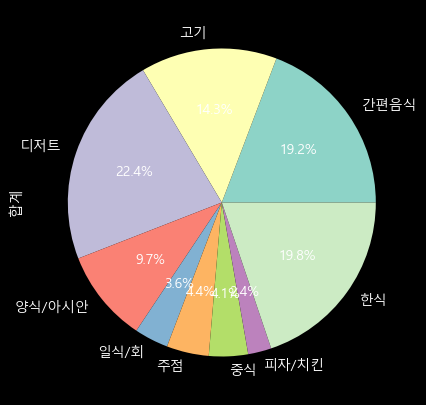

In [378]:
성별_업종['합계'].plot.pie(autopct='%0.1f%%')
plt.show()
plt.close()

4. 성별

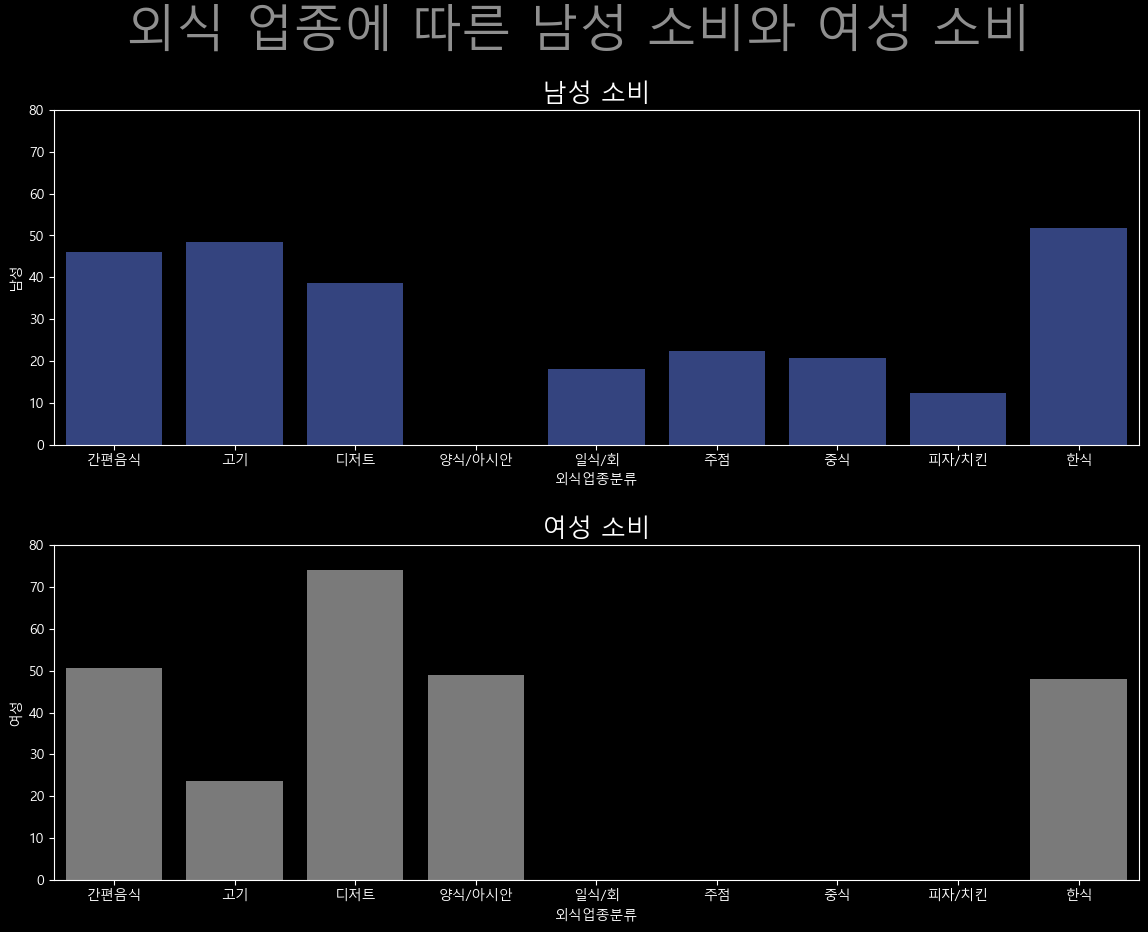

In [379]:
fig, (ax1_left, ax2_left) = plt.subplots(2, 1, figsize=(14, 10))
fig.suptitle('외식 업종에 따른 남성 소비와 여성 소비', fontsize=36, color='#8f8f8f')
fig.subplots_adjust(wspace=0.2, hspace=0.3)

sb.barplot(data=성별_업종, x=성별_업종.index, y='남성', color="#273d8c", ax=ax1_left)
ax1_left.set_title('남성 소비', fontsize=18)
ax1_left.set_ylim(0, 80) 

sb.barplot(data=성별_업종, x=성별_업종.index, y='여성', color="#7a7a7a", ax=ax2_left)
ax2_left.set_title('여성 소비', fontsize=18)
ax2_left.set_ylim(0, 80) 

plt.show()
plt.close()

5. 연령별

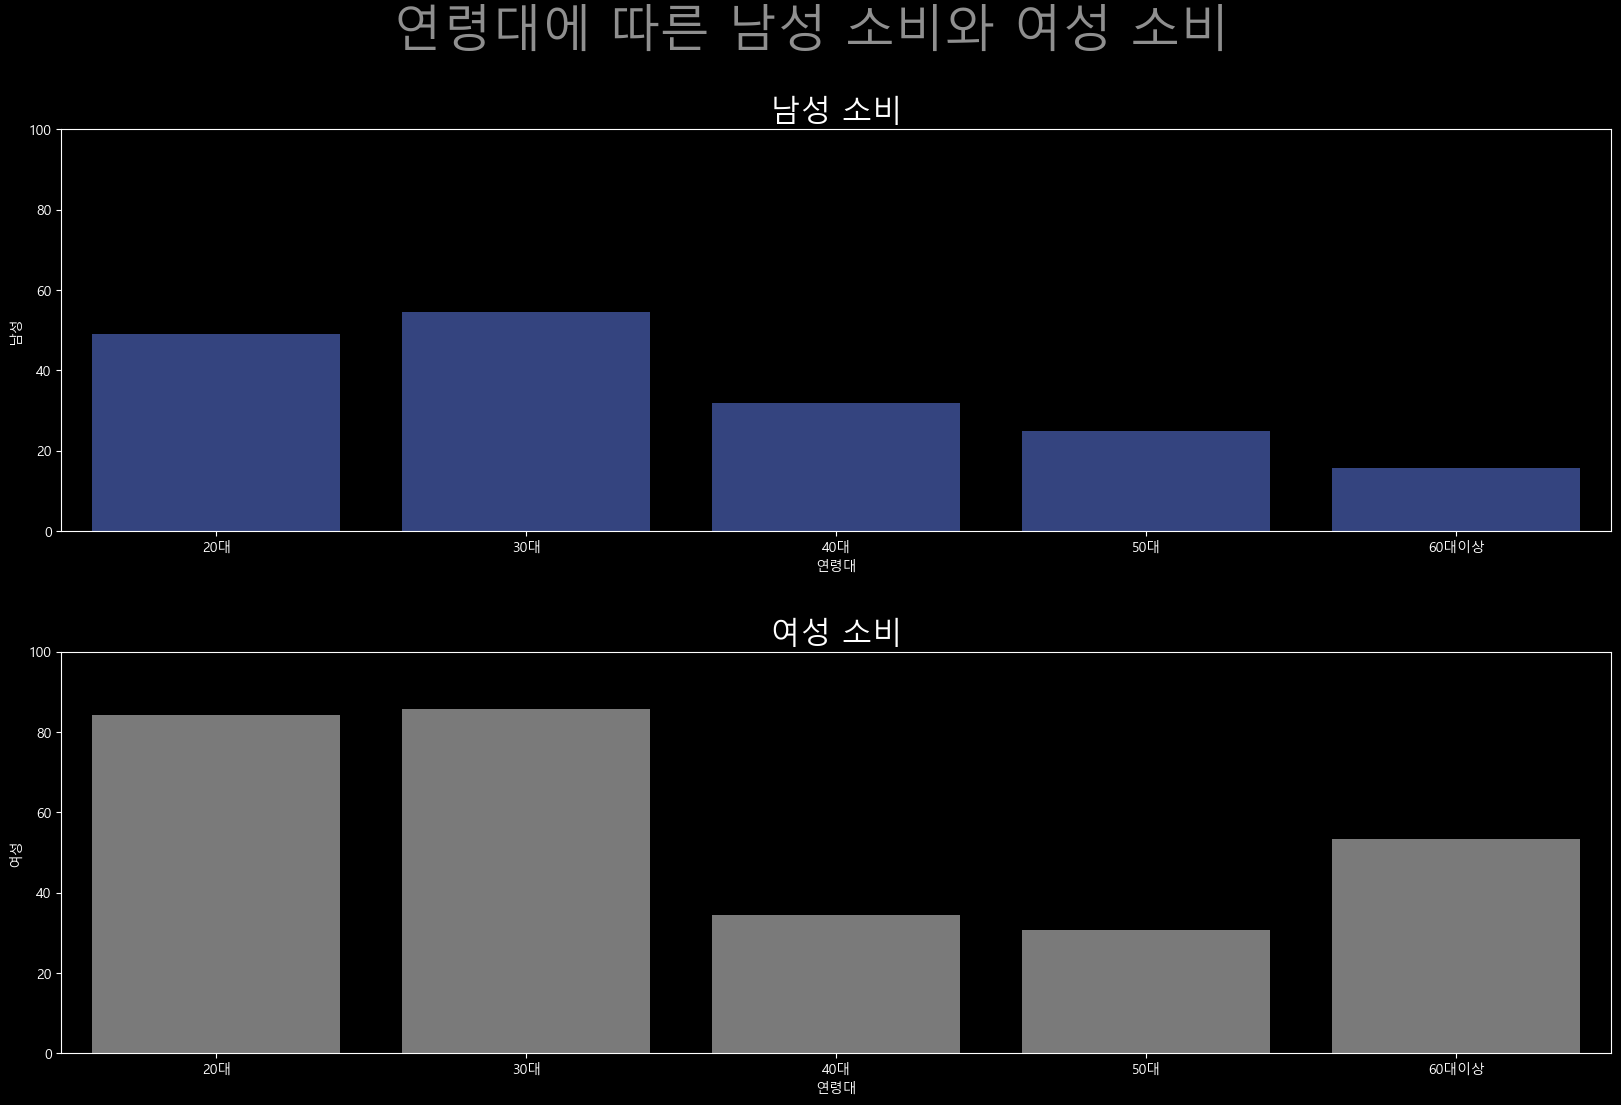

In [380]:
fig, (ax1_left, ax2_left) = plt.subplots(2, 1, figsize=(20, 12))
fig.suptitle('연령대에 따른 남성 소비와 여성 소비', fontsize=36, color='#8f8f8f')
fig.subplots_adjust(wspace=0.2, hspace=0.3)

sb.barplot(data=성별_연령, x=성별_연령.index, y='남성', color="#273d8c", ax=ax1_left)
ax1_left.set_title('남성 소비', fontsize=22)
ax1_left.set_ylim(0, 100) 

sb.barplot(data=성별_연령, x=성별_연령.index, y='여성', color="#7a7a7a", ax=ax2_left)
ax2_left.set_title('여성 소비', fontsize=22)
ax2_left.set_ylim(0, 100) 

plt.show()
plt.close()

산점도(추세선) - 연령 
scatterplot '배달음식 연령별 소비건수' ## 집단별 산점도 그래프

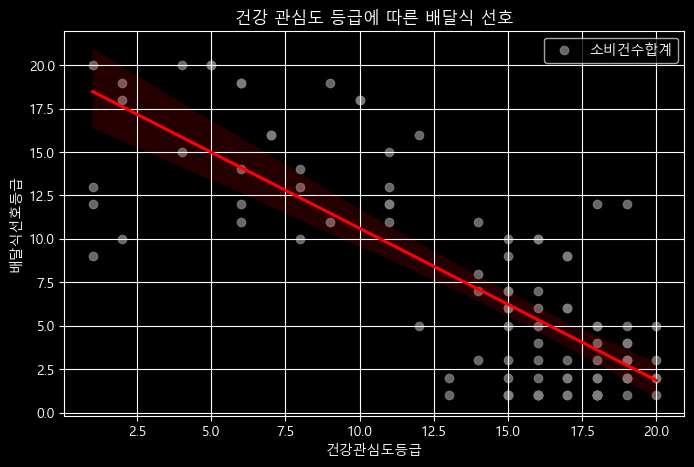

In [381]:
sb.regplot(data=df,x='건강관심도등급',y='배달식선호등급',label='소비건수합계',line_kws={'color':'red'},scatter_kws={'color':'grey'})
plt.title('건강 관심도 등급에 따른 배달식 선호')
plt.xlabel('건강관심도등급')
plt.ylabel('배달식선호등급')
plt.legend()
plt.grid()
plt.show()
plt.close()

In [382]:
성별_배달식선호등급 = pivot_table(df,
            index='배달식선호등급', 
            columns='성별',
            values='소비건수합계',
            aggfunc='mean' 
)
성별_배달식선호등급

성별,남성,여성
배달식선호등급,,
1,56.090909,113.857143
2,54.666667,89.333333
3,24.500000,35.285714
4,12.500000,82.000000
5,69.000000,61.250000
6,50.333333,25.000000
7,33.750000,NaN
8,NaN,110.000000
9,13.500000,42.500000


In [383]:
desc_배달식 = 성별_배달식선호등급.describe()
desc_배달식

성별,남성,여성
count,18.000000,18.000000
mean,32.574495,53.378307
std,18.312054,33.962054
min,10.000000,16.000000
25%,17.625000,28.625000
50%,28.000000,38.916667
75%,47.750000,77.250000
max,69.000000,113.857143


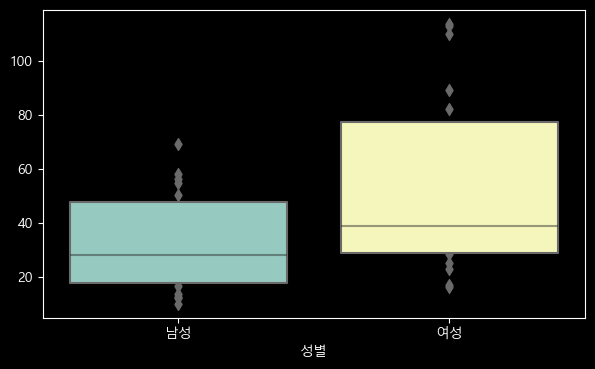

In [384]:
plt.rcParams['figure.figsize'] = (7,4)
plt.figure()
sb.boxenplot(data=성별_배달식선호등급)
plt.show()
plt.close()

In [385]:
성별_건강관심도등급 = pivot_table(df,
            index='건강관심도등급', 
            columns='성별',
            values='소비건수합계',
            aggfunc='mean' 
)
성별_건강관심도등급 = 성별_건강관심도등급.fillna(value=0)
성별_건강관심도등급

성별,남성,여성
건강관심도등급,,
1,17.000000,65.000000
2,20.000000,42.500000
4,17.000000,0.000000
5,28.500000,0.000000
6,18.500000,12.000000
7,10.000000,63.000000
8,31.000000,15.500000
9,0.000000,42.000000
10,58.000000,19.000000


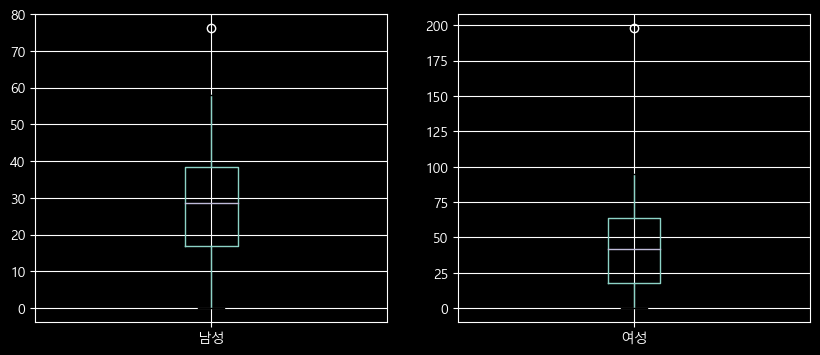

In [386]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
성별_건강관심도등급.boxplot(['남성'],ax=ax1)
성별_건강관심도등급.boxplot(['여성'],ax=ax2)
plt.show()
plt.close()

모자이크 - 평일/휴일 
+ 성별 소비건수 (두 개 이상 범주에 대한 비율 표시) 

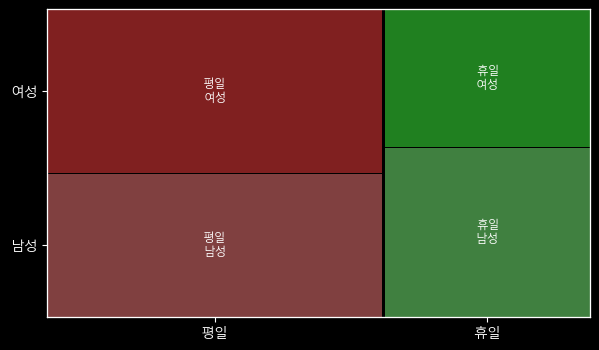

In [387]:
mosaic(df,['평일휴일','성별'])
plt.show()
plt.close()

y축 2개 - 업종 
2개 y축 그래프 한 번에 - 서울/전국 누적확진자와 일일 확진자 변동추이 ? 합계야 평균이야???????

In [418]:
# index를 일반 컬럼으로 변환 
df2 = 성별_건강관심도등급.reset_index()
mdf = melt(df2,id_vars=['건강관심도등급'],value_vars=['남성','여성'],
           var_name='구분',value_name='소비건수합계')
mdf

,건강관심도등급,구분,소비건수합계
0,1,남성,17.000000
1,2,남성,20.000000
2,4,남성,17.000000
3,5,남성,28.500000
4,6,남성,18.500000
5,7,남성,10.000000
6,8,남성,31.000000
7,9,남성,0.000000
8,10,남성,58.000000
9,11,남성,32.333333


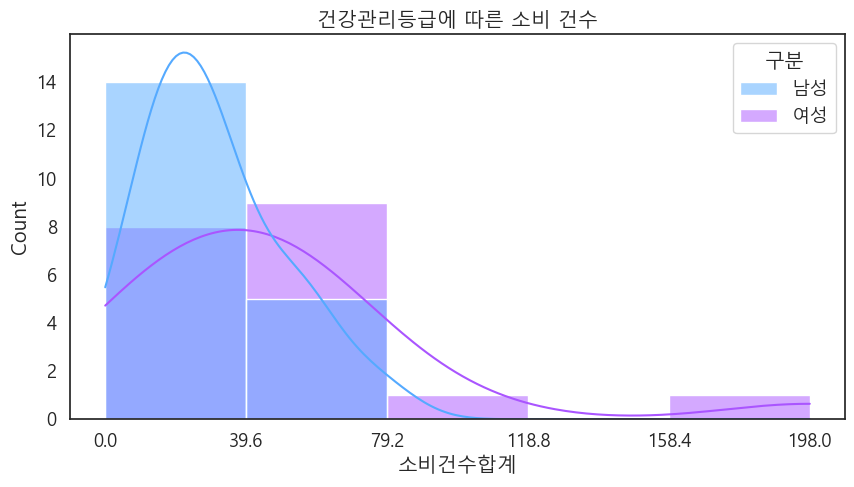

In [420]:
hist, bins = np.histogram(mdf['소비건수합계'], bins=5)
bins2 = np.round(bins, 1)

plt.figure(figsize=(10,5))

sb.set_theme(style='white', font='Malgun Gothic', font_scale=1.2)
plt.title('건강관리등급에 따른 소비 건수')
sb.histplot(data=mdf, x='소비건수합계', bins=5, hue='구분', kde=True, palette='cool')
plt.xticks(bins2, bins2) 

plt.show()
plt.close()

In [412]:
# index를 일반 컬럼으로 변환 
df3 = 성별_배달식선호등급.reset_index()
mdf2 = melt(df3,id_vars=['배달식선호등급'],value_vars=['남성','여성'],
           var_name='구분',value_name='소비건수합계')
mdf2 = mdf2.fillna(value=0)
mdf2

,배달식선호등급,구분,소비건수합계
0,1,남성,56.090909
1,2,남성,54.666667
2,3,남성,24.500000
3,4,남성,12.500000
4,5,남성,69.000000
5,6,남성,50.333333
6,7,남성,33.750000
7,8,남성,0.000000
8,9,남성,13.500000
9,10,남성,40.000000


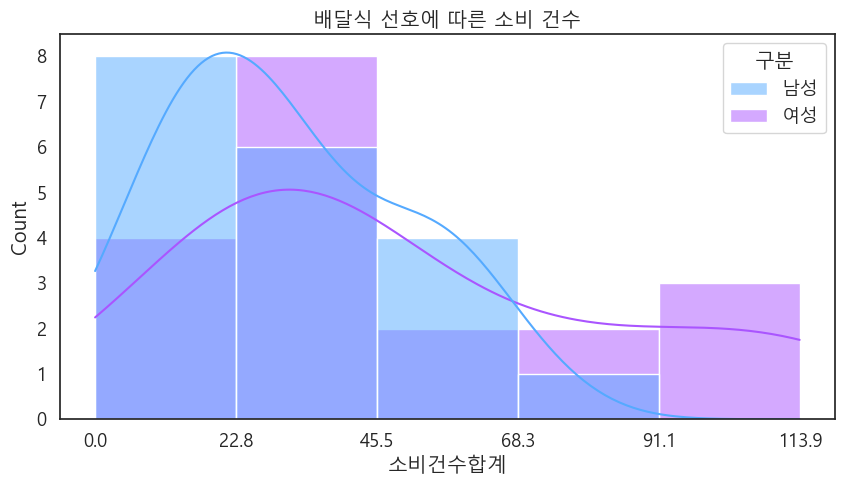

In [422]:
hist, bins = np.histogram(mdf2['소비건수합계'], bins=5)
bins2 = np.round(bins, 1)


plt.figure(figsize=(10,5))
sb.set_theme(style='white', font='Malgun Gothic', font_scale=1.2)
sb.histplot(data=mdf2, x='소비건수합계', bins=5, hue='구분', kde=True, palette='cool')
plt.title('배달식 선호에 따른 소비 건수')
plt.xticks(bins2, bins2) 
#plt.ylim(20)

plt.show()
plt.close()

In [ ]:
# catplot - 건강관심도 
# 등급에 따른 배달음식 소비 건수를 여부를 두 개의 그래프로 분리

서울 지도 시각화

전국 지도 시각화